# Versuch 1
## Molare Wärmekapazität von Festkörpern
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen? Die allgemeinen bereits bekannten und vorausgetzten Python-Kompetenzen könnt ihr unter [Anforderungen.ipynb](Anforderungen.ipynb) nachlesen. Dort sind auch einige Ratschläge bspw. zum Exportieren von Grafiken oder Hinweise zu <code>NumPy</code> aufgeführt.

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!

In [2]:
from Hilfsdateien.importe_Bibliotheken import *

Wenn ihr wollt, könnt ihr auch einige für die Auswertung notwendige Naturkonstanten bereits jetzt importieren von <code>scipy.constants</code>. Bedenkt, dass ihr diese Variablennamen nicht erneut nutzen solltet in der Auswertung! 

Es ist sinnvoll, bereits jetzt etwaige Konstanten zu definieren, oder Werte für den studentschen $t$-Faktor einzutragen. Achtet wenn notwendig auf die Einheiten! Auch konstante Größen wie Vor- und Nachlaufzeiten können hier als Variablen definiert werden.

In [3]:
from Hilfsdateien.importe_Konstanten import *
t_vor = 50 #s
t_nach = 225#s

## Erster Auswertungsschritt
Zunächst wollen wir unsere Messwerte in ein 4D-Array mit <code>numpy</code> einlesen. Welchen Befehl solltet ihr hierfür nutzen? Es wird davon ausgegangen, dass es $n$ Messreihen mit $j$ Messwertepaaren bei $k$ Messgrößen bei $q$ Temperaturen gibt. Idealerweise sind eure Messwerte entsprechend in $n$ verschiedenen Dateien mit $j$ Zeilen und $k$ Spalten aufgeteilt. Entsprechend erstellen wir zunächst ein leeres Numpy-Array mit den entsprechenden Dimensionen.

In [4]:
n,q,j,k = 3,3,1252,2
data_arr = np.empty((n,q,j,k))

Mittels <code>enumerate</code> kann sowohl ein Index als auch der Wert eines Elements in einem Array übertragen werden. Die erste Variable ist immer der Index und die Zweite der Eintrag im Array. Wir wollen enumerate über ein Array laufen lassen, welches die Pfade zu unseren Messwerten enthält. Innerhalb dieser Schleife soll eine <code>for</code>-Schelife laufen, mit der über die einzelnen Temperaturen iteriert wird. Um uns Aufwand zu ersparen, sollten die Dateinamen das Format <code>Verbindung_Temperatur</code> haben. Dadurch können die einzelnen Strings in den Arrays zu den Dateinamen "addiert" werden, aus bspw. "Zink" und "70K" würde "Zink70K" werden.

Wie erstellt ihr diese Schleifenkonstruktion und mit welchem Numpy-Befehl _generieren_ wir in Python aus z.B. txt-Dateien (aber natürlich auch aus csv, dat,…) Arrays? Die Messwerte bei einem Index $i$ können dem $i$-ten Element in unserem 4D-Array zugewiesen werden, sodass alle Messreihen in einem großen Array gespeichert sind.

In [5]:
# 0,1,2 = Graphit, Kupfer, Zink
# 0,1,2 = 77.15,200.15,297.15 K
for i,compound in enumerate(["Graphit","Kupfer","Zink"]):
    for j,temperature in enumerate(["_77,15K","_200,15K","_297,15K"]):
        dateiname = compound + temperature
        data_arr[i,j,:,:] = np.genfromtxt("data_v1/"+dateiname,usecols=(0,1))

***
Nachfragen, ob hier bereits Kalibrierfunktion? Bräuchte dann Datensatz, wenn der gefittet werden soll!
***
Als nächstes müssen die Messwerte in Millivolt in die Celsius-Temperatur $\vartheta$ umgerechnet werden. Dies geschieht mit Hilfe einer Kalibrierfunktion $g(U)$. __Es wird davon ausgegangen, dass die Kalibrierfunktion gegeben ist.__ Diese müssen wir nachfolgend in Python definieren. Als Funktionsvariable sollte entsprechend die Spannung in Millivolt übergeben werden. Implementiert nun die Kalibrierfunktion in Python bspw. manuell mit „purem“ Python, oder mit numpy, etc.!

In [6]:
#Manuell
#def kalib_f(U_mV):
#    theta = 0.34975 + 25.2758*U_mV - 0.52311*U_mV**2 + 0.08576*U_mV**3 - 0.004*U_mV**4
#    return theta
#Numpy, [::-1] nur, damit der x**4-Term zu Beginn steht trotz anderer Reihenfolge im Array
kalib_f = np.poly1d(np.array([0.34975,25.2758,-0.52311,0.08576,-0.004][::-1]))

An diese können nun unsere gemessenen Spannungen übergeben werden. Die Werte im 4D-Array können direkt überschrieben werden oder in einem neuen Array gespeichert werden. 

In [7]:
data_arr[:,:,:,1] = kalib_f(data_arr[:,:,:,1])

Hiernach müsst ihr den Temperaturanstieg durch lineare Regression jeweils über die Vor- und die Nachlaufzeit zu bestimmen. Im Idealfall entspräche das Ergebnis einer Steigung von null und der y-Achsenschittpunkt wäre der Mittelwert, in der Realität sind Abweichungen davon zu erwarten. Zur linearen Regression stehen verschiedene Module zur Auswahl, welches ihr nutzt ist euch überlassen. An die jeweilige Funktion muss natürlich der entsprechende Wertebereich übergeben werden, diesen könnt ihr mit numpy _extrahieren_ oder mittels "purem" Python erhalten. Ihr könntet beispielsweise ein Array mit den Ober- und Untergrenzen jeweils für die obere und für die untere Ausgleichsgerade für die einzelnen Funktionen definieren oder als eine Variable bei jeder Messung konstant halten. Zur weiteren Auswertung sollten die einzelnen Fittingvariablen in einem mehrdimensionalen Array gespeichert werden.

In [8]:
#0,1 = m,b von f(x) = m*x + b
vorlauf  = np.empty((n,q,2))
nachlauf = np.empty((n,q,2))
t_vor = np.array([[[0,50],[0,50],[0,50]],[[10,70],[0,50],[10,50]],[[10,60],[0,50],[5,40]]])
t_nach = np.array([[[250,np.inf],[200,np.inf],[180,np.inf]],[[200,320],[230,300],[100,np.inf]],[[250,np.inf],[180,np.inf],[100,np.inf]]])
for i in range(n):
    for j in range(q):
        vor_x  = np.extract((data_arr[i,j,:,0] < t_vor[i,j,1]) & (data_arr[i,j,:,0] > t_vor[i,j,0]), data_arr[i,j,:,0])
        vor_y  = np.extract((data_arr[i,j,:,0] < t_vor[i,j,1]) & (data_arr[i,j,:,0] > t_vor[i,j,0]), data_arr[i,j,:,1])
        nach_x = np.extract((data_arr[i,j,:,0] < t_nach[i,j,1]) & (data_arr[i,j,:,0] > t_nach[i,j,0]), data_arr[i,j,:,0])
        nach_y = np.extract((data_arr[i,j,:,0] < t_nach[i,j,1]) & (data_arr[i,j,:,0] > t_nach[i,j,0]), data_arr[i,j,:,1])
        vor_fit  = linregress(vor_x,vor_y)
        nach_fit = linregress(nach_x,nach_y)
        vorlauf[i,j,:]  = np.array([vor_fit.slope,vor_fit.intercept])
        nachlauf[i,j,:] = np.array([nach_fit.slope,nach_fit.intercept])


Als nächstes muss die mittlere Celsius-Temperatur $\vartheta$ und der Temperaturanstieg $\Delta\vartheta$ ermittelt werden. Hierzu werden die bestimmten Ausgleichsgeraden genutzt. Diese bilden mit den Messwerten je zwei Flächen, eine ober- und eine unterhalb der Kurve. Die Temperatur, bei der durch die Lotrechte zwei gleich große Flächen ober- und unterhalb der Messwerte entstehen, ist $\vartheta$ und $\Delta \vartheta$ ist _nur_ an dieser Stelle abzulesen. Hierzu wird mit <code>cumtrapz</code> aus <code>scipy.integrate</code> das kumulierte Integral nach der [Trapezregel](https://www.spektrum.de/lexikon/mathematik/numerische-integration/9304) für beide Flächen bestimmt. Die Position, an der der Betrag der Differenz beider Kurven minimal ist, soll unsere mittlere Celsius-Temperatur $\vartheta$ sein. An dieser Position wird auch der Temperaturanstieg $\Delta \vartheta$ abgelesen, welche wir für die weitere Auswertung bereits in ein Array schreiben können. Das Ergebnis sollte im eigenen Interesse grafisch auf Plausibilität kontrolliert werden.

_Erweitertes:_ Die Daten sind vermutlich stark verrauscht. Zum Glätten kann aus <code>scipy.signal</code> eine Funktion für einen [Savitzky-Golay-Filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter) importiert werden. Bei diesem werden über ein bestimmtes Intervall Polynome mit der Ordnung $\zeta$ gefittet. _Die Originaldaten sind natürlich dennoch in der Auftragung zu zeigen!_

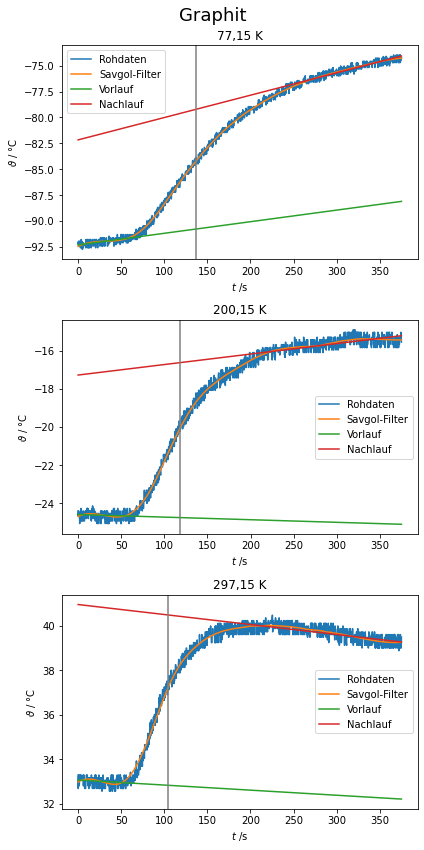

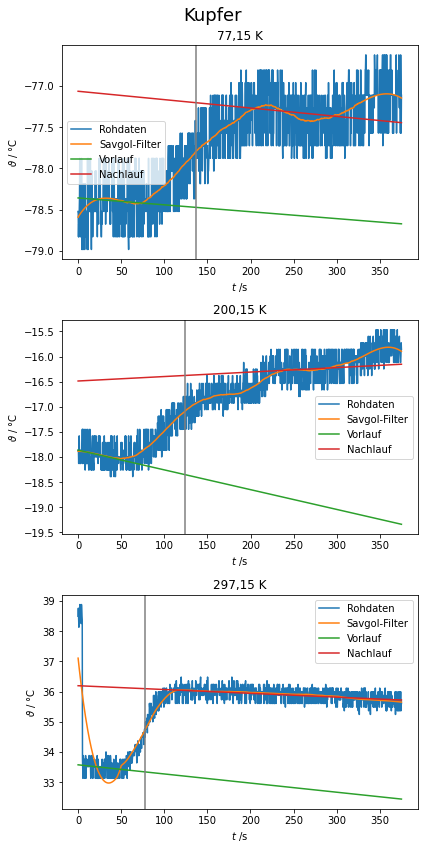

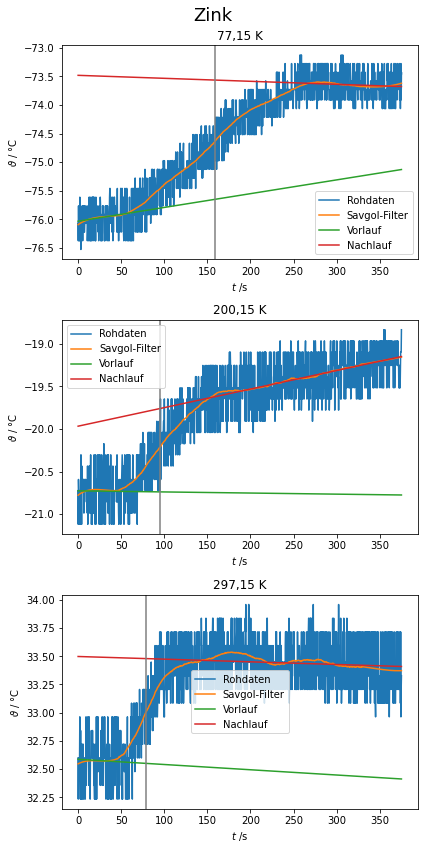

[[[-83.855  11.546]
  [-20.225   8.127]
  [ 37.138   7.646]]

 [[-77.724   1.271]
  [-17.055   1.973]
  [ 34.761   2.751]]

 [[-74.975   2.088]
  [-20.725   0.978]
  [ 33.085   0.93 ]]]


In [9]:
from scipy.signal import savgol_filter
T_data = np.empty((n,q,2))
for i,compound in enumerate(["Graphit","Kupfer","Zink"]):
    f,ax = plt.subplots(nrows=3,figsize=(6,12))
    for j,temp in enumerate(["77,15 K","200,15 K","297,15 K"]):
        #Integral
        lower_limit = t_vor[i,j,1]
        upper_limit = t_nach[i,j,0]
        x_region = np.extract((data_arr[i,j,:,0] > lower_limit) & (data_arr[i,j,:,0] < upper_limit),data_arr[i,j,:,0])
        y_region = np.extract((data_arr[i,j,:,0] > lower_limit) & (data_arr[i,j,:,0] < upper_limit),data_arr[i,j,:,1])
        
        flaeche_unten = cumtrapz(y_region - (vorlauf[i,j,0]*x_region + vorlauf[i,j,1]),x=x_region)
        # [::-1 invertiert das Array]
        flaeche_oben = cumtrapz(-y_region[::-1] + (nachlauf[i,j,0]*x_region[::-1] + nachlauf[i,j,1]),x=x_region[::-1])
    
        min_diff = np.amin(np.abs(flaeche_oben[::-1]+flaeche_unten))
        min_diff_pos = np.argmin(np.abs(flaeche_oben[::-1]+flaeche_unten))
    
        T_data[i,j,0] = y_region[min_diff_pos]
        T_data[i,j,1] = (nachlauf[i,j,0]*x_region[min_diff_pos] +nachlauf[i,j,1]) - (vorlauf[i,j,0]*x_region[min_diff_pos] + vorlauf[i,j,1])
        
        
        #Plotten
        #Savgol-Filter, NICHT von Studenten verlangt
        y_smooth = savgol_filter(data_arr[i,j,:,1],window_length=301,polyorder=3)
        #y_deriv = savgol_filter(data_arr[i,j,:,1],window_length=301,polyorder=3, deriv=1, delta=data_arr[i,j,1,0] - data_arr[i,j,0,0])
        ax[j].plot(data_arr[i,j,:,0],data_arr[i,j,:,1],label="Rohdaten")
        ax[j].plot(data_arr[i,j,:,0],y_smooth,label="Savgol-Filter")
        ax[j].plot(data_arr[i,j,:,0],data_arr[i,j,:,0]*vorlauf[i,j,0]+vorlauf[i,j,1],label="Vorlauf")
        ax[j].plot(data_arr[i,j,:,0],data_arr[i,j,:,0]*nachlauf[i,j,0]+nachlauf[i,j,1],label="Nachlauf")
        ax[j].axvline(x_region[min_diff_pos],color='tab:gray')
        #plt.plot(data_arr[i,j,:,0],y_deriv)
        ax[j].set_ylabel(r"$\vartheta$ / °C")
        ax[j].set_xlabel("$t$ /s")
        ax[j].set_title(temp)
        ax[j].legend(loc=0)
    plt.suptitle(compound,size=18)
    plt.tight_layout()
    plt.show()
    plt.close()
print(T_data)

## Zweiter Auswertungsschritt
Nachdem ihr nun den Temperaturanstieg und die mittlere Temperatur bestimmt habt, ist es eure Aufgabe, den stoffspezifischen Faktor $f$ nach der Gleichung
\begin{align}
    f = \frac{C_{p,\mathrm{lit}}}{C_{p,\mathrm{exp}}}
\end{align}
zu bestimmen. Hierzu benötigt ihr die experimentelle isobare Wärmekapazität $C_{p,\mathrm{exp}}$ und deren Literaturwert $C_{p,\mathrm{lit}}$. $C_{p,\mathrm{exp}}$ könnt ihr nach der im Praktikumsskript gegebenen Gleichung
\begin{align}
    C_{p,\mathrm{exp}} = \frac{U\cdot I\cdot t_\mathrm{Heiz}}{n\cdot\Delta\vartheta}
\end{align}
aus der Spannung $U$ bei einer Stromstärke $I$ und der Stoffmenge $n$ bei einer Aufheizzeit $t_\mathrm{Heiz}$ berechnen. Hierzu wollen wir SymPy nutzen, welches uns ermöglicht eine Funktion $C_p(U,I,n,\Delta\vartheta,t_\mathrm{Heiz})$ zu erstellen und die Ableitungen von $C_p$ zu ermitteln. Zunächst müssen die Variablen als „Symbole“ für SymPy erstellt werden. Wie könnt ihr dies machen? Nachdem die Ausdrücke definiert haben, müssen diese mittels eines weiteren SymPy-Befehls in aufrufbare Funktionen überführt werden (GIYF, eine [anonyme Funktion](https://de.wikipedia.org/wiki/Anonyme_Funktion) wird oftmals lambda-Funktion genannt!). An diese Funktion können wir dann die Messwerte übergeben und erhalten $C_p$ als Ergebnis.
_Hinweis:_ Damit im dritten Auswertungsschritt nicht eine erneute Funktion definiert werden muss, sollte die nachfolgende Funktion bereits einen Korrekturfaktor $f$ enthalten. Im aktuellen Auswertungsschritt ist dieser eins und ohne Messunsicherheit, dies ändert sich jedoch im dritten Auswertungsschritt.

In [10]:
f_fakt,df_fakt,U,dU,I,dI,temp_diff,dtemp_diff,t_heiz,dt_heiz,n_menge = symbols('f df U dU I dI T_diff dT_diff t_heiz dt_heiz n')
Cp = f_fakt*U*I*t_heiz/(n_menge*temp_diff)
dCp = sqrt((diff(Cp,f_fakt)*df_fakt)**2 + (diff(Cp,U)*dU)**2 + (diff(Cp,I)*dI)**2 + (diff(Cp,t_heiz)*dt_heiz)**2 + (diff(Cp,temp_diff)*dtemp_diff)**2)

C_p = lambdify([f_fakt,U,I,t_heiz,n_menge,temp_diff],Cp,'scipy')
dC_p = lambdify([f_fakt,df_fakt,U,dU,I,dI,t_heiz,dt_heiz,n_menge,temp_diff,dtemp_diff],dCp,'scipy')

Laut Aufgabenstellung ist der Korrekturfaktor ausgehend von $C_{p,\mathrm{exp}}$ bei Raumtemperatur zu bestimmen. Setzt die zuvor bestimmten Werte in die soeben erstellte Funktion für $C_p$ ein und bestimmt $f$ ($m$ und $C_{p,\mathrm{lit}}$ sind im Skript aufgeführt).

In [11]:
U_arr = np.array([np.mean([3.80,3.75]),np.mean([4.31,4.38]),np.mean([4.17,4.08])])
dU_arr = np.array([np.std([3.80,3.75]),np.std([4.31,4.38]),np.std([4.17,4.08])])
n_arr = np.array([32.0789/12.0107,57.1944/63.546,45.29/65.39])
I_heiz = 900/1000 #A
dI_heiz = 0.5/1000 #A
heiz_t = 25 #s
C_p_RT = np.empty(3)
dC_p_RT = np.empty(3)
for i in range(3):
    C_p_RT[i] = C_p(1,U_arr[i],I_heiz,heiz_t,n_arr[i],T_data[i,2,1])
    dC_p_RT[i] = dC_p(1,0,U_arr[i],dU_arr[i],I_heiz,dI_heiz,heiz_t,0.5,n_arr[i],T_data[i,2,1],0.1)
print(C_p_RT)
C_p_lit = np.array([8.517,24.47,25.33])
f = C_p_lit/C_p_RT
df = dC_p_RT*C_p_lit/C_p_RT**2

print(np.array([f,df]))

[  4.159  39.479 144.167]
[[2.048 0.62  0.176]
 [0.051 0.026 0.019]]


## Dritter und vierter Auswertungsschritt (im Skript mal zu kombinieren)
Als nächstes soll anhand des Korrekturfaktors $f$ und der Funktion für $C_p$ die isobare Wärmekapazität als Funktion der Temperatur $T$ (nicht $\vartheta$!) bestimmt werden. Selbstverändlich sind wir für Fehlerbalken auch an der Unsicherheit $\Delta C_{p}$ interessiert. Berechnet nun für _alle_ Messungen $C_p$ bei der jeweiligen Temperatur unter Berücksichtigung von $f$.

In [12]:
#0,1,2 Graphit,Kupfer,Zink
#0,1,2 77K, 200K, 297K
C_p_all = np.empty((3,3))
dC_p_all = np.empty((3,3))
for i in range(3):
    for j in range(3):
        C_p_all[i,j] = C_p(f[i],U_arr[i],I_heiz,heiz_t,n_arr[i],T_data[i,j,1])
        dC_p_all[i,j] = dC_p(f[i],df[i],U_arr[i],dU_arr[i],I_heiz,dI_heiz,heiz_t,0.5,n_arr[i],T_data[i,j,1],0.1)
dC_p_all

array([[0.19 , 0.279, 0.299],
       [4.867, 2.369, 1.463],
       [1.377, 3.655, 3.939]])

Nun soll $C_p$ als eine Funktion von $T$ gezeichnet werden. Achtet wie üblich auf Achsenbeschriftungen, Legende, etc.

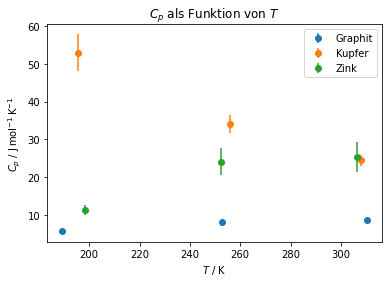

In [13]:
for i,compound in enumerate(["Graphit","Kupfer","Zink"]):
    plt.errorbar(T_data[i,:,0]+273.15,C_p_all[i,:],yerr=dC_p_all[i,:],label=compound,ls="None",marker="o")
plt.legend()
plt.title("$C_p$ als Funktion von $T$")
plt.xlabel("$T$ / K")
plt.ylabel("$C_p$ / $\mathrm{J}\,\mathrm{mol}^{-1}\,\mathrm{K}^{-1}$")
plt.show()
plt.close()

## Fünfter Auswertungsschritt
Nach dem Debye-Model wird die isochore Wärmekapazität $C_V$ nach der im Praktikumsskript gegebenen Gleichung
\begin{align}
    C_V(T) &= 3\cdot R\cdot\left(4\cdot D(x)-\frac{3\cdot x}{\exp(x)-1}\right) \\
    x &= \frac{\Theta_\mathrm{D}}{T}
\end{align}
mit der Debye-Temperatur $\Theta_\mathrm{D}$ und der Debye-Funktion
\begin{align}
    D(x) = \left(\frac{3}{x^3}\right)\cdot\int_0^x \frac{t^3}{\exp(x)-1}\mathrm{d}t.
\end{align}

Die Funktionen sollten erneut mittels SymPy implementiert werden. Zunächst wollen wir $D(x)$ implementieren. SymPy besitzt einen aus vorherigen Modulen euch bereits bekannten Befehl zum Berechnen bestimmter Integrale!

In [14]:
x,t = symbols('x t')
y = t**3/(exp(t)-1)
D = (3/x**3)*integrate(y,(t,0,x))

Diese Funktion für $D(x)$ kann nun genutzt werden, um eine Funktion $C_V(T)$ darauf basierend zu definieren.

In [15]:
CV = 3*R*(4*D - 3*x/(exp(x)-1))

#Leider geht dies nicht mit 'numpy' wegen des Integrals
#Es ist SEHR wichtig, dass scipy genutzt wird.
#Andernfalls würde es zu einer Fehlermeldung kommen, da das math-Paket aus Python NumPy-Arrays nicht korrekt interpretiert, NumPy selber aber keinen äquivalenten Befehl zum Integrieren von Funktionen besitzt
C_V = lambdify(x,CV,'scipy')
#0,1,2 Graphit, Kupfer, Zink
#0,1,2,3 die vier Werte
x_arr = 1/np.array([[0.15,0.20,0.25,0.30],[0.40,0.50,0.60,0.70],[0.40,0.50,0.60,0.70]])
C_V_arr = np.empty((3,4))

for i in range(3):
    for j in range(4):
        C_V_arr[i,j] = C_V(x_arr[i,j])
print(C_V_arr)

[[ 5.313  9.195 12.548 15.158]
 [18.604 20.588 21.795 22.573]
 [18.604 20.588 21.795 22.573]]


## Sechster Auswertungsschritt
In den vorherigen Auswertungsschritten haben wir $C_p(T)$ bei einer Celsius-Temperatur $\vartheta$ während der Messungen bestimmt. Aus den berechneten $C_V$-Werten sollen Temperaturen $T$ erhalten werden und daraus soll nun die Debye-Temperatur $\Theta_\mathrm{D}$ bestimmt werden. Näherungsweise kann ein linearer Zusammenhang zwischen $C_p$ und $T$ angenommen werden, sodass eine lineare Regression nun vorgenommen werden sollte. _Für Fortgeschrittene_: Mittels einer orthogonalen Regression mit <code>scipy.odr</code> kann die Unsicherheit der einzelnen Messgrößen in x und y bei der Regression berücksichtigt werden.

In [16]:
#0,1,2 Graphit, Kupfer, Zink
#0,1 Ergebnis, Unsicherheit
#0,1 m,b
C_p_coeff = np.empty((3,2,2))

def func(x,a,b):
    return a*x+b
for i in range(3):
    #Ungewichtet
    #fit = linregress(x=T_data[i,:,0]+273.15,y=C_p_all[i,:])
    #C_p_coeff[i,0,:] = fit.slope, fit.intercept
    #C_p_coeff[i,1,:] = fit.stderr,fit.intercept_stderr
    
    #Fehlergewichtet in y
    popt,pcov = curve_fit(func,T_data[i,:,0]+273.15,C_p_all[i,:],absolute_sigma=True,sigma=dC_p_all[i,:])
    perr = np.sqrt(np.diag(pcov))
    C_p_coeff[i,0,:] = popt
    C_p_coeff[i,1,:] = perr
print(C_p_coeff)

[[[ 2.569e-02  9.106e-01]
  [ 2.831e-03  6.693e-01]]

 [[-2.265e-01  9.387e+01]
  [ 3.705e-02  1.072e+01]]

 [[ 1.505e-01 -1.825e+01]
  [ 3.557e-02  7.734e+00]]]


Anstelle einer Funktion $T(C_V)$ ist dies natürlich eine Funktion $C_p(T)$. Folglich sollten die Parameter von $T(C_V)$ so umgestellt werden, dass wir $C_V(T)$ und daraus $C_p(T)$ erhalten. Dies _kann_ auch durch SymPy geschehen! Es sollte auch die Unsicherheit von $T$ bestimmt werden!

Aus den Ergebnissen für $T(C_v)$ kann durch eine einfache Multiplikation $\Theta_\mathrm{D}$ erhalten werden.

In [17]:
#C_P(T) = m*T + b
#C_V(T) = m*T + b, da C_V etwa C_p im Festkörper
#C_V - b = m*T
#T(C_V) = (C_V  -b)/m.
Cv_var,slope,dslope,inter,dinter = symbols("C_V m dm b db")

TCV = (Cv_var- inter)/slope
dTCV = sqrt((diff(TCV,slope)*dslope)**2 + (diff(TCV,inter)*dinter)**2)

T_CV = lambdify([Cv_var,slope,inter],TCV,'numpy')
dT_CV = lambdify([Cv_var,slope,dslope,inter,dinter],dTCV,'numpy')

T_CV_arr = np.empty((3,4))
dT_CV_arr = np.empty((3,4))
for i in range(3):
    T_CV_arr[i] = T_CV(C_V_arr[i],np.array([C_p_coeff[i,0,0]]*4),np.array([C_p_coeff[i,0,1]]*4))
    dT_CV_arr[i] = dT_CV(C_V_arr[i],np.array([C_p_coeff[i,0,0]]*4),np.array([C_p_coeff[i,1,0]]*4),np.array([C_p_coeff[i,0,1]]*4),np.array([C_p_coeff[i,1,1]]*4))
#print(np.array([T_CV_arr,dT_CV_arr]))
theta_d = T_CV_arr*x_arr
dtheta_d = dT_CV_arr*x_arr
print(np.array([theta_d,dtheta_d]))

[[[1142.332 1612.307 1811.89  1848.566]
  [ 830.572  646.939  530.237  449.588]
  [ 612.064  516.013  443.373  387.409]]

 [[ 214.484  220.28   225.193  221.413]
  [ 180.146  141.969  117.229   99.891]
  [ 193.4    159.43   135.287  117.315]]]


Aus den einzelnen Ergebnissen für $\Theta_\mathrm{D}$ ist der fehlergewichtete Mittelwert und die fehlergewichtete Standardabweichung als Unsicherheit zu erhalten. Bedenkt, dass die _inverse_ Unsicherheit einer Größe der korrekte Gewichtungsfaktor ist (siehe [NumPy Dokumentation](https://numpy.org/doc/stable/reference/generated/numpy.average.html))!

In [18]:
theta_mean = np.average(theta_d,weights=1/dtheta_d,axis=1)
dtheta_mean = np.empty(3)
for i in range(3):
    dtheta_mean[i] = np.sqrt(np.cov(theta_d[i],aweights=1/dtheta_d[i]))
print(np.array([theta_mean,dtheta_mean]))

[[1599.208  584.252  474.472]
 [ 326.947  157.561   94.31 ]]


## Siebter Auswertungsschritt
Abschließend sollen in einer Auftragung die experimentellen Ergebnisse für $C_p$ und die Vorhersagen für $C_v$ nach dem Debye-Model als Funktion von $\tfrac{T}{\Theta_\mathrm{D}}$ dargestellt werden. Macht dies nun, natürlich mit Fehlerbalken sowohl für die x- als auch die y-Achse!

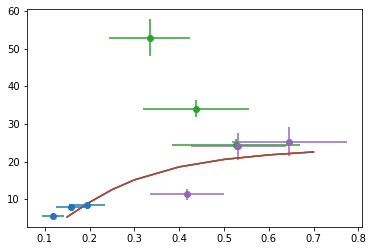

In [19]:
x_arr_2 = np.array([0.15,0.20,0.25,0.30,0.40,0.50,0.60,0.70])
y_arr_2 = np.array([C_V(i) for i in 1/x_arr_2])
for i,compound in enumerate(["Graphit","Kupfer","Zink"]):
    x_val = (T_data[i,:,0]+273.15)/theta_mean[i]
    x_err = ((T_data[i,:,0]+273.15) * dtheta_mean[i])/theta_mean[i]**2
    plt.errorbar(x_val,C_p_all[i,:],yerr=dC_p_all[i,:],xerr=x_err,label=compound,ls="None",marker="o")
    plt.plot(x_arr_2,y_arr_2)
plt.show()
plt.close()

---
Arved Dorst, Göttingen, __2021__.